# Stockes Flow

In [1]:
#importing libraries
import numpy
import numba
from numba import jit
from matplotlib import pyplot
%matplotlib inline

#defining grid
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

#initial guess
p = numpy.zeros((ny,nx))
w = numpy.zeros((ny,nx))

#dérivative of p along the top border
u=1.

l1_target = 1e-6

In [2]:
@jit
def L1norm(new, old):
    '''Calculate l1 norm between new and old
    
    Parameters:
    ----------
    new : Array of floats
        
    old : Array of floats
    
    Returns:
    -------
    norm : double
            value of the l1 Norm
    '''
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [ ]:

def poisson_2d_1step(p, b, dx, dy):
    '''Performs Jacobi relaxation for the poisson equation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    p_out = numpy.empty_like(p)
    
    
    #enforcing BC elsewhere
    return p_out

In [ ]:
def laplace_2d_1step(p, dx, dy):
    '''Performs Jacobi relaxation for the laplace equation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    dx: float
         spacing in x direction
    dy: float
        Mesh spacing in y direction
    
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    p_out = numpy.empty_like(p)
    
   
    #enforcing BC elsewhere   
    return p_out

In [ ]:

def enforceBCphi(p):
    '''Enforce the boundary conditions for p
    
    Parameters:
    ----------
    p : 2D array of floats
        solution before applying BC
    dx: float
         spacing in x direction
    dy: float
        Mesh spacing in y direction
    Returns:
    -------
    p_out : 2D array of floats
        solution after applying BC
    '''

    
    return p_out

def enforceBCw(w,p,dx,dy,u):
    '''Enforce boundary conditions for w
    
    Parameters:
    ----------
    w : solution before applying BC
    p : source term for bc
    dx: float
         spacing in x direction
    dy: float
        Mesh spacing in y direction
    u : some parameter (here the derivative along the top border)
    
    Returns:
    -------
    w_out : solution after applying BC 
    '''
    
    #neumann + laplace
   
    #top
    
    
    return w_out

In [11]:
@jit
#solve the biharmonic équation as a laplace and a poisson coupled equation
def biHarmonicSolver(p, w, dx, dy, l1Target, u):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    p : 2D array
        initial guess for p
    w : 2D array
        initial quess for w
    dx : float
        grid width in x
    dy : float
        grid width in y
    l1Target : float
        Target for the l1 norm between two iteration
    u : float
        parameter for bc
    
    Returns:
    -------
    p: 2D array
        solution for p
    w: 2D array
        solution for w
    l1phi : float
        l1 norm between two last iteration for p
    l1w : float
        l1 norm between two last iteration for w
    '''
    l1phi=l1Target+1
    l1w=l1Target+1
    nbStep=0
    #we have to force a few loop for the problem to start converging fast enough for  
    while nbStep<=100:
        po=numpy.copy(p)
        wo=numpy.copy(w)
        
        #solve poisson equation for phi
        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * ((po[1:-1,2:]+po[1:-1,:-2])*dy**2 + (po[2:,1:-1] + po[:-2,1:-1])*dx**2 - wo[1:-1,1:-1]*dx**2*dy**2)

        #BC for phi
        #top
        p[:,-1]=0.
        #bottom
        p[:,0]=0.
        #left
        p[0,:]=0.
        #right
        p[-1,:]=0.
        
        l1phi = L1norm(p, po)
        
        #solve laplace equation for omega
        w[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * ((wo[1:-1,2:]+wo[1:-1,:-2])*dy**2 + (wo[2:,1:-1] + wo[:-2,1:-1])*dx**2)
        
        #enforce BC for omega
        #top
        w[-1,:]=-(8*p[-2,:]-p[-3, :])/2/dy/dy - 3*u/dy 
        #bottom
        w[0,:]=-(8*p[1,:]-p[2,:])/2/dy/dy
        #left
        w[:,0]=-(8*p[:,1]-p[:,2])/2/dx/dx
        #right
        w[:,-1]=-(8*p[:,-2]-p[:,-3])/2/dx/dx
        l1w=L1norm(w, wo)
        
        nbStep=nbStep+1
    print(nbStep)
    return p, w, l1phi, l1w, nstep

In [15]:
#we solve équation and check the résult
nstep = 0.
p, w, l1phi, l1w, nstep = biHarmonicSolver(p, w, dx, dy, l1_target, u)
#we check that l1-norm is < target
print(l1phi, l1w)

101
3659137256337102.0 1.9492642784770322e+19


<function matplotlib.pyplot.colorbar>

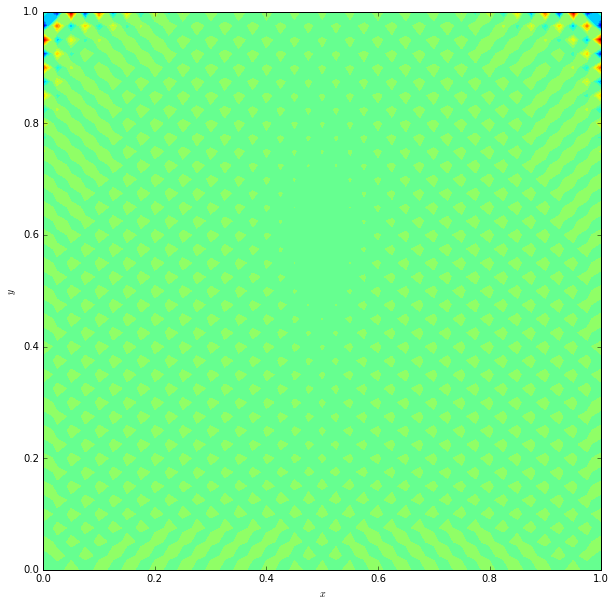

In [16]:
#print w
x=numpy.linspace(0, l, nx)
y=numpy.linspace(0, h, ny)
pyplot.figure(figsize=(10,10))
pyplot.contourf(x,y,w,20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar

<function matplotlib.pyplot.colorbar>

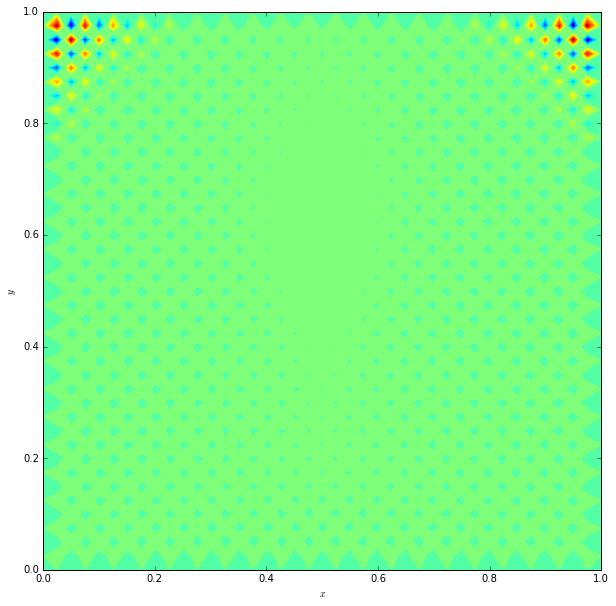

In [17]:
#print phi
x=numpy.linspace(0, l, nx)
y=numpy.linspace(0, h, ny)
pyplot.figure(figsize=(10,10))
pyplot.contourf(x, y, p, 20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar

In [ ]:
L1norm(p, numpy.zeros((41,41)))

In [ ]:
numpy.round(p[32,::8], 4)